# Introduction to SciKit-Learn

Author: Amol Mavuduru

Notebook Created: October 2017

This notebook is designed to give you a brief introduction to scikit-learn, a library that has become one of the most popular machine learning frameworks for python. This library is designed with Object-Oriented Programming (OOP) principles in mind and consequently it is intuitive and easy to use. In just a few lines of code, you can initialize, train, and test anything from simple algorithms like Linear Classifiers and Decision Trees to cutting-edge machine learning algorithms such as Support Vector Machines, Random Forests, and even deep Neural Networks. 

The documentation website for scikit-learn can be found here: http://scikit-learn.org/stable/


## Installation Instructions

You can check out the following link: http://scikit-learn.org/stable/install.html

Make sure you have the following dependencies:
    - Python (>= 2.7 or >= 3.3) (If you have 2.7 or 3.3 or higher either should be fine)
    - Numpy
    - Pandas (This is specific to our demo)
    - Scipy 

If you don't have Scipy, but you have Python and Numpy you should be fine, since if pip does not find Scipy on your system it will probably install it for you when you install scikit-learn.

To install sklearn, just go to your terminal and issue the following command:
##### pip install sklearn

Note that you can install all of the above dependencies using pip as well.

Once scikit-learn is installed you should be ready to follow along.

## Scikit-Learn Demo: Working with an Actual Dataset

In this demo we are going to use scikit-learn to train and test machine learning models on a real dataset! This dataset is designed to aid in Breast Cancer diagnosis and has been made publicly available at both the UCI Machine Learning repository, and on Kaggle.

### Description of the dataset

- Name: Breast Cancer Wisconsin (Diagnostic)
- Kaggle Link: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
- UCI Machine Learning Link: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

### Description of the problem we are trying to solve 

Our goal is to build a machine learning model that can take into account the features of a cell in this dataset and essentially diagnose a tumor as "benign" or "malignant". This is a "binary classification" problem, which means we want to develop a model that can classify a tumor as belonging to one of two classes, which are "benign" (B) and "malignant" (M). 

### Importing Libraries

In [1]:
import numpy as np   # For linear algebra
import pandas as pd  # For data preprocessing and CSV File I/O
import sklearn  # For training machine learning models!

The libraries below are optional, but I will use them for data visualization.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading in and exploring the data

The data.csv file should be in the same directory as this notebook and this is the case in the Github repository. We can use pandas to read in the csv file as an object called a dataframe using the read_csv function.

After that we can display the first 5 rows of the dataframe using the head() function

In [3]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


The data contains several features and a diagnosis label (or class) that is either B or M to indicate a benign or malignant tumor respectively.
Now that we know what our data looks like, we can get some general information about the data using the info() function.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

We can also take a look at some general statistics about the data.

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Simple preprocessing

Now we are going to do a little bit of preprocessing and split our data into a set of features (X) and a set of target labels (y). 

In [6]:
data = data.drop('Unnamed: 32', axis=1)

In [7]:
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis']

In [8]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

### Train, Test, Split

In machine learning, we always need a way to evaluate our models. In order to do this, we want to split our data into a training set and a testing set. Rather than training our model on the entire dataset for the purpose evaluation, we only train the model on the training test first and then evaluate the model's performance in predicting the class of samples on the test set. 

This practice, which is sometimes referred to as cross-validation, is designed to simulate our model's performance on unseen data and provides a measure of the ability of our model to generalize to a broader variety of data.

In [10]:
from sklearn.model_selection import train_test_split # This function is necessary to split the data

What train_test_split does:

- Takes in two dataframes, X and y as parameters corresponding to the features and target column. 
- Contains a parameter called test_size that allows you to specify the proportion of the data that is used for the test set. In the case we will make the test set 30% of our data, which is usually pretty standard.
- The random_state parameter allows us to specify the random seed so that the results are reproducible.
- The function returns a tuple of four objects:
    - X_train: Dataframe with feature values for training set.
    - X_test: Dataframe with feature values for testing set.
    - y_train: Dataframe with labels (diagnosis) for training samples.
    - y_test: Dataframe with labels (diagnosis) for testing set.


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Training a Machine Learning Model - Logistic Regression

Now that we have split our data into training and test sets, we are ready to train a machine learning model using scikit-learn! We will be using a Logistic Regression model that unlike the name, is actually used for classification tasks such as this one. The Logistic Regression algorithm relies on a function called the sigmoid function, which has the graph of an S-shaped curve and maps any real value to a value in the range (0, 1).

The equation for the function is f(z) = 1/(1 + e^-z) and I have plotted this function below for reference.

#### Graph of the sigmoid function.

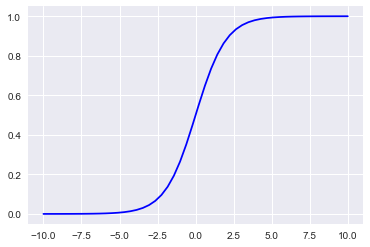

In [12]:
X_values = np.linspace(-10, 10)
y_values = 1/(1 + np.exp(-1*X_values))
plt.plot(X_values, y_values, color='Blue')

The logistic regression model computes the weighted sum of each of the features and optimizes these weights in a manner similar to a neural network. Then, the weighted sum is passed to the sigmoid function, which returns a number from 0 to 1. If the number is greater than or equal to 0.5 we classify it as a positive class and if the number is less than 0.5 we classify it as a negative class. 

Training a Logistic Regression model is simple, as demonstrated below.

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_model = LogisticRegression(C=2)
log_model.fit(X_train, y_train)

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Evaluating Our Logistic Regression Model

In [15]:
from sklearn.metrics import classification_report

In [16]:
predictions = log_model.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          B       0.93      0.97      0.95       105
          M       0.95      0.88      0.91        66

avg / total       0.94      0.94      0.94       171



#### Explanation of Metrics in Classification Report

The classification report that we printed out contains the following metrics:

- precision - the ratio of correctly predicted positive observations (true positives) to the total predicted positive observations. In the context of this problem, for the M class, this is the number of correctly predicted diagnoses of malignant tumors divided by the total number of predicted malignant tumors. 
- recall - the ratio of correctly predicted positive observations to all observations actually in that class.
- f1-score - a weighted average of precision and recall.

Based on the classification report our model is very accurate considering we did not have to do much preprocessing.

A more intuitive evaluation metric is accuracy, which is simply the number of correct predictions divided by the total number of predictions. Next we will take a look at this metric. 

In [17]:
from sklearn.metrics import accuracy_score
print('Our logistic regression model has an accuracy of: {} %'.format(100*accuracy_score(y_test, predictions)))

Our logistic regression model has an accuracy of: 93.56725146198829 %


Let's see if we can do any better by experimenting with the value of C. This process is called hyperparameter tuning.

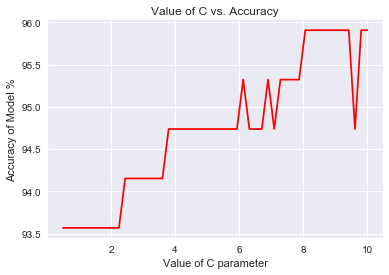

In [18]:
C_vals = np.linspace(0.5, 10, num=50)
accuracies = []

for C_val in C_vals:
    model = LogisticRegression(C=C_val)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(100*accuracy_score(y_test, pred))
    
plt.plot(C_vals, np.array(accuracies), color='Red')
plt.xlabel("Value of C parameter")
plt.ylabel("Accuracy of Model %")
plt.title("Value of C vs. Accuracy")

From the graph above, we can see that increasing the value of C up to 8 increases the cross-validation accuracy of our model, but going any further does not yield any improvements.

This level of accuracy is pretty good, considering we did not have to do anything to complicated. This is the power of scikit-learn!

### Decision Tree Model

A decision tree is exactly what the name implies. It is a model with nodes in a tree that represent the possible values of different features. Based on these values, we can take different steps in the tree until we reach a leaf node, which corresponds to a class prediction. (Image from: http://jmvidal.cse.sc.edu/talks/decisiontrees/allslides.html) 

<img src="dt.png" style="width: 600px; height: 500px;"/>

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [21]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          B       0.92      0.92      0.92       105
          M       0.88      0.86      0.87        66

avg / total       0.90      0.90      0.90       171



In [22]:
print('Our decision tree model has an accuracy of: {} %'.format(100*accuracy_score(y_test, predictions)))

Our decision tree model has an accuracy of: 90.05847953216374 %


Our decision tree model did a little worse than our logistic regression model but this is expected since single decision trees are usually not strong models by themselves. 

### Ensemble Methods - Random Forests

While a single decision tree is not very strong, combining the predictions of many different decision trees using majority voting results in a very powerful model called a random forest. Next we will experiment with training a random forest model on the data! A random forest is essentially a classifier that combines the predictions of multiple decision trees using majority voting.

In [23]:
from sklearn.ensemble import RandomForestClassifier

We are going to train a random forest classifier with 1000 decision trees and set n_jobs equal to -1 to allow for the decision trees to be constructed in parallel with multiple threads. 

In [24]:
forest = RandomForestClassifier(max_depth=6, n_jobs=-1, n_estimators=1000) 

In [25]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=1000, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [26]:
predictions = forest.predict(X_test)
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          B       0.96      0.97      0.97       105
          M       0.95      0.94      0.95        66

avg / total       0.96      0.96      0.96       171



In [27]:
print('Our random forest model has an accuracy of: {} %'.format(100*accuracy_score(y_test, predictions)))

Our random forest model has an accuracy of: 95.90643274853801 %


As you can see, our random forest model outperforms both the logistic regression and single decision tree models. Let's see how increasing the number of trees affects the accuracy of the model.

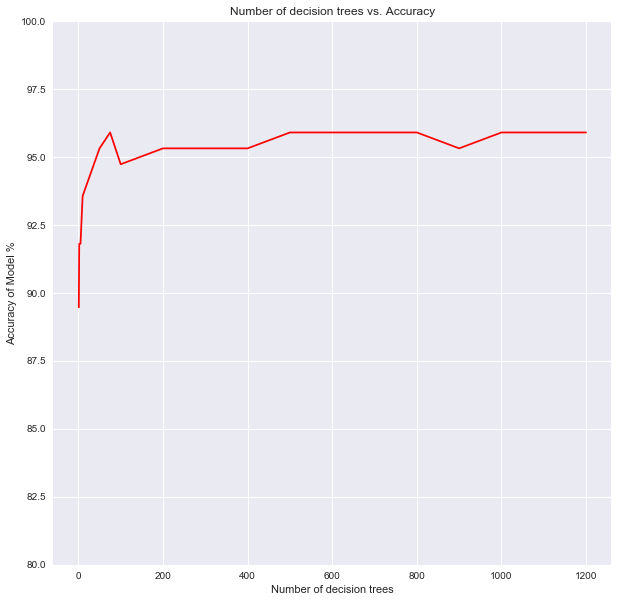

In [37]:
num_estimators_list = [1, 2, 5, 10, 50, 75, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
accuracies = []

for num_estimators in num_estimators_list:
    model = RandomForestClassifier(max_depth=6, n_jobs=-1, n_estimators=num_estimators) 
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    accuracies.append(100*accuracy_score(y_test, pred))

plt.figure(figsize=(10,10))
plt.plot(np.array(num_estimators_list), np.array(accuracies), color='Red')
plt.xlabel("Number of decision trees")
plt.ylim(80, 100)
plt.ylabel("Accuracy of Model %")
plt.title("Number of decision trees vs. Accuracy")

From the graph above we can see that increasing the number of decision trees in our random forest improves the accuracy of our model up to a certain point.

## How to get better results and where to go from here

With each of these models, we did not have to do much preprocessing and still achieved excellent cross validation results! However, if we want to go a step further, we can try the following techniques:

- More ensemble methods - Bagging, Adaboosting, etc.
- Feature engineering - do some research and try to extract more features from the data.
- Techniques for dimensionality reduction such as PCA, ICA, LDA.
- Get more data!
- Combine multiple models using majority voting or stacking!

Feel free to explore further and check out the scikit-learn website to try out different models and experiment with different datasets.